In [ ]:
from utils import set_up_altair, moving_averages, read_json_to_df, format_time_columns,aggregate_by_year_month, filter_by_year
from statsmodels.tsa.seasonal import STL as STL
import pandas as pd
import altair as alt
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
PATH = "../../data/all_incidents.json"
data = read_json_to_df(PATH)
data = format_time_columns(data)
incident_count = aggregate_by_year_month(data)
incident_count.set_index('dateTime', inplace=True)


In [18]:
PATH = "../../data/all_incidents.json"
data = read_json_to_df(PATH)
data = format_time_columns(data)
incident_count = aggregate_by_year_month(data)
incident_count.set_index('dateTime', inplace=True)

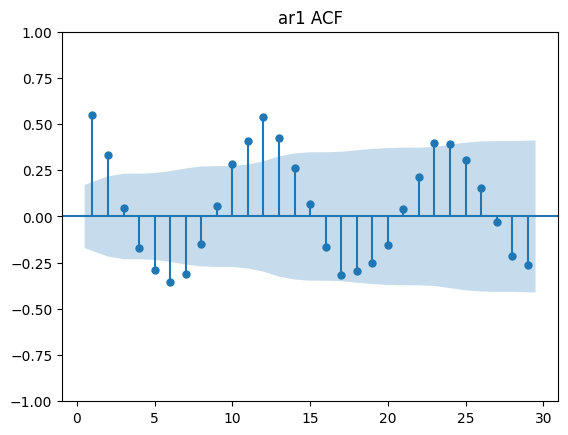

In [ ]:
fig = sm.tsa.graphics.plot_acf(incident_count['Incident'], lags=range(1,30), alpha=0.05,title = 'ar1 ACF')


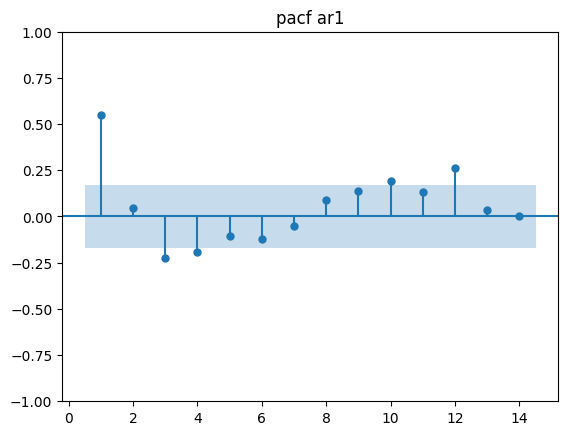

In [21]:
fig = sm.tsa.graphics.plot_pacf(incident_count['Incident'], lags=range(1,15), alpha=0.05, title = 'pacf ar1')


In [15]:
data.describe()

,date,year,month,year_month
count,1410,1410.000000,1410.000000,1410
mean,2020-11-15 01:57:26.808510464,2020.353191,6.763830,2020-10-31 00:34:43.404255232
min,2014-12-30 00:00:00,2014.000000,1.000000,2014-12-01 00:00:00
25%,2017-10-06 06:00:00,2017.000000,5.000000,2017-10-01 00:00:00
50%,2021-06-27 12:00:00,2021.000000,7.000000,2021-06-01 00:00:00
75%,2023-08-27 12:00:00,2023.000000,9.000000,2023-08-01 00:00:00
max,2025-11-04 00:00:00,2025.000000,12.000000,2025-11-01 00:00:00
std,NaN,3.255188,2.834988,NaN


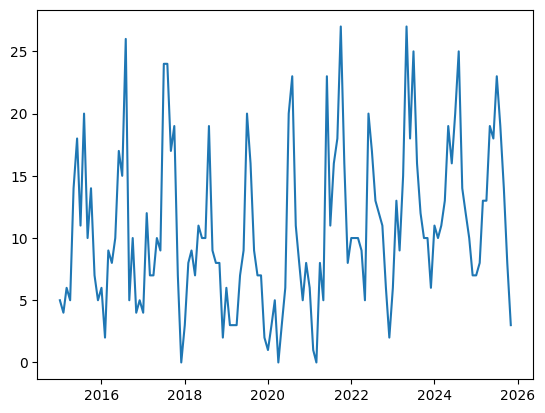

In [23]:
annual_values = incident_count['Incident'].resample('A').mean()


C:\Users\Chua Shi Min\AppData\Local\Temp\ipykernel_5028\2736089038.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_values = incident_count['Incident'].resample('A').mean()


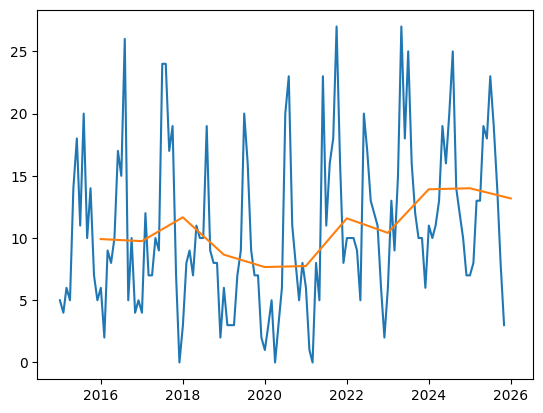

In [24]:
plt.plot(incident_count['Incident'])
plt.plot(annual_values)


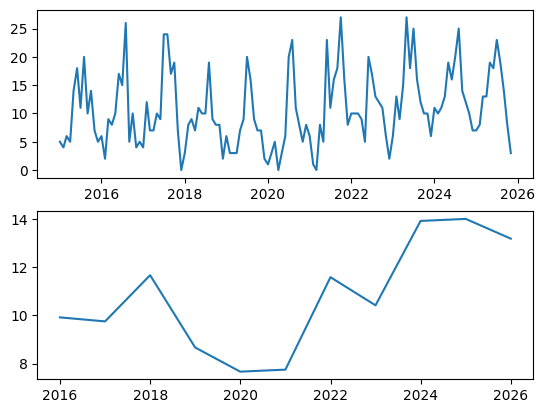

In [25]:
fig, axes = plt.subplots(2,1)
axes[0].plot(incident_count['Incident'])
axes[1].plot(annual_values)

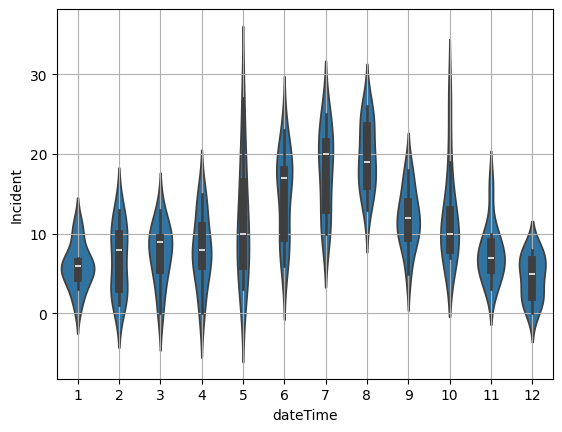

In [27]:
# violinplot of months to determine variance and range
sns.violinplot(x=incident_count.index.month, y=incident_count.Incident)
plt.grid()

In [28]:
# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

Test Statistic           -1.486544
p-value                   0.540157
Lags Used                11.000000
Observations Used       119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


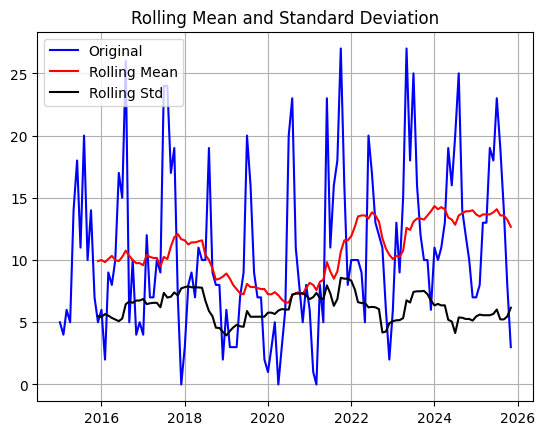

In [29]:
dftest(incident_count.Incident)

In [30]:
month_ts = incident_count.Incident


In [35]:
rolling_mean = month_ts.rolling(window=12).mean()
rolling_sd = month_ts.rolling(window=12).std()

In [39]:
rolling_mean.describe()

count    120.000000
mean      10.725000
std        2.341113
min        6.583333
25%        8.500000
50%       10.375000
75%       13.250000
max       14.333333
Name: Incident, dtype: float64

In [43]:
month_ts.shift(12).to_csv('ts_shift12.csv')

In [44]:
month_ts.to_csv('ts_no_shift.csv')

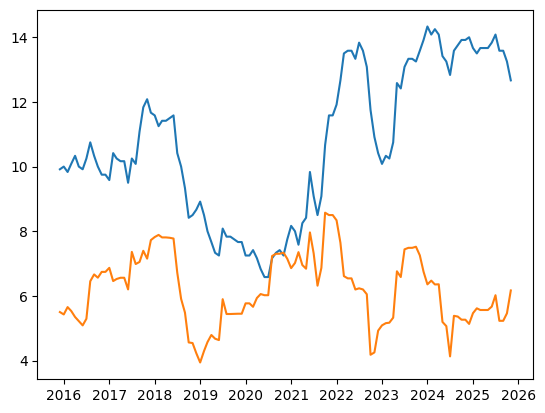

In [36]:
plt.plot(rolling_mean)
plt.plot(rolling_sd)


In [5]:
incident_count.set_index('dateTime', inplace=True)

In [12]:
model = sm.tsa.ArmaProcess(incident_count['Incident'], (1, 0)).fit(trend='nc', disp=0)
model.params

AttributeError: 'ArmaProcess' object has no attribute 'fit'

In [37]:
ts.adfuller(month_ts)


(np.float64(-1.4865444553965372),
 np.float64(0.5401567933397874),
 11,
 119,
 {'1%': np.float64(-3.4865346059036564),
  '5%': np.float64(-2.8861509858476264),
  '10%': np.float64(-2.579896092790057)},
 np.float64(716.9525896738346))

In [46]:
month_ts

dateTime
2015-01-01     5.0
2015-02-01     4.0
2015-03-01     6.0
2015-04-01     5.0
2015-05-01    14.0
              ... 
2025-07-01    23.0
2025-08-01    19.0
2025-09-01    14.0
2025-10-01     8.0
2025-11-01     3.0
Name: Incident, Length: 131, dtype: float64

In [50]:
month_log =  np.log(month_ts)

c:\Users\Chua Shi Min\Documents\mountain_rescue\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
